In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

sns.set_style('dark')

fo_m_13=pd.read_csv('FrenchOpen-men-2013.csv')

Q. What is the aggression level among the players? Are there some players who play very aggressively or are there some who are not so aggressive?

In [9]:
unique_vals = pd.concat([fo_m_13['Player1'], fo_m_13['Player2']]).unique()

In [10]:
df=fo_m_13[['Player1', 'Player2', 'ACE.1', 'WNR.1', 'NPA.1', 'ACE.2', 'WNR.2', 'NPA.2']]
df

,Player1,Player2,ACE.1,WNR.1,NPA.1,ACE.2,WNR.2,NPA.2
0,Pablo Carreno-Busta,Roger Federer,1,12,20,10,33,18
1,Somdev Devvarman,Daniel Munoz-De La Nava,7,26,21,0,40,25
2,Tobias Kamke,Paolo Lorenzi,4,42,32,6,39,27
3,Julien Benneteau,Ricardas Berankis,14,48,30,13,72,43
4,Lukas Lacko,Sam Querrey,4,21,5,10,42,13
...,...,...,...,...,...,...,...,...
120,Rafael Nadal,Stanislas Wawrinka,5,31,16,3,23,30
121,Novak Djokovic,Tommy Haas,11,46,27,4,19,17
122,David Ferrer,Jo-Wilfried Tsonga,3,24,22,6,31,16
123,Novak Djokovic,Rafael Nadal,5,54,50,6,61,26


In [11]:
df1=pd.DataFrame(columns=['Player', 'Aces', 'Winners', 'Net points attempted'])

for i in range(len(unique_vals)):
    for index, row in df.iterrows():
        if unique_vals[i]==row['Player1']:
            s=pd.Series([row['Player1'], row['ACE.1'], row['WNR.1'], row['NPA.1']], index=['Player', 'Aces', 'Winners', 'Net points attempted'])
            df1=pd.concat([df1, s.to_frame().T], ignore_index=True)
        elif unique_vals[i]==row['Player2']:
            s=pd.Series([row['Player2'], row['ACE.2'], row['WNR.2'], row['NPA.2']], index=['Player', 'Aces', 'Winners', 'Net points attempted'])
            df1=pd.concat([df1, s.to_frame().T], ignore_index=True)

df1

,Player,Aces,Winners,Net points attempted
0,Pablo Carreno-Busta,1,12,20
1,Somdev Devvarman,7,26,21
2,Somdev Devvarman,2,12,14
3,Tobias Kamke,4,42,32
4,Tobias Kamke,5,55,34
...,...,...,...,...
245,Guido Pella,4,52,31
246,Guido Pella,1,10,7
247,David Goffin,7,32,26
248,Janko Tipsarevic,9,49,32


In [12]:
data=df1.groupby('Player').mean()
data=data.dropna()
data

,Aces,Winners,Net points attempted
Player,,,
Adrian Mannarino,5.0,45.0,41.000000
Albert Montanes,4.0,33.0,16.500000
Albert Ramos,5.0,22.0,18.000000
Alejandro Falla,1.0,6.0,7.000000
Alex Kuznetsov,5.0,34.0,26.000000
...,...,...,...
Vasek Pospisil,21.0,58.0,30.000000
Victor Hanescu,4.0,24.0,17.666667
Viktor Troicki,9.5,35.5,26.750000


In [13]:
model=KMeans(n_clusters=2)
model.fit(data)                    
labels = model.labels_
centers = model.cluster_centers_

c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


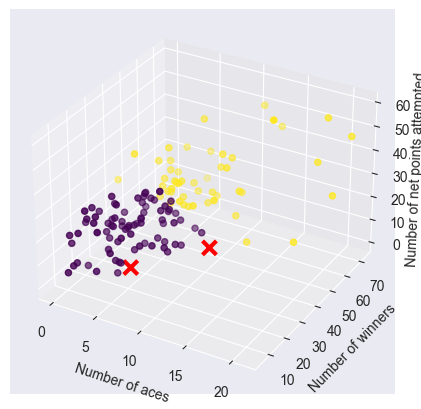

In [14]:
fig=plt.figure(figsize=(15, 5))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(data['Aces'], data['Winners'], data['Net points attempted'], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=100, linewidths=3, color='r', alpha=1)
ax.set_xlabel('Number of aces')
ax.set_ylabel('Number of winners')
ax.set_zlabel('Number of net points attempted')
ax.zaxis.labelpad=-2
plt.show()